**Install Necessary Libraries:**

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl

**Import Libraries:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

**Using File Upload in Google Colab:**

In [4]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()  # You'll be prompted to select the file

# Load the dataset
data = pd.read_excel(list(uploaded.keys())[0])

# Display the first few rows
print(data.head())

Saving new creditcard.xlsx to new creditcard.xlsx
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141

**Check the Dataset:**

In [5]:
# Check for null values
print(data.isnull().sum())

# View dataset info
print(data.info())

# View column names and basic statistics
print(data.describe())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19 non-null     int64  
 1   V1      19 non-null     float64
 2   V2      19 non-null     float64
 3   V3      19 non-null     float64
 4   V4      19 non-null     float64
 5   V5      19 non-null     float64
 6   V6      19 non-null     float64
 7   V7      19 non-null     float64
 8   V8      19 non-null     float64
 9   V9      19 non-null     float64
 10  V10     19 non-null     float64
 11  V11     19 non-null     fl

**Explore the Dataset:**

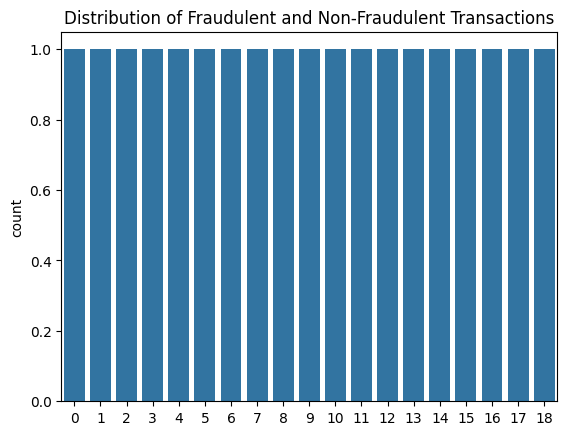

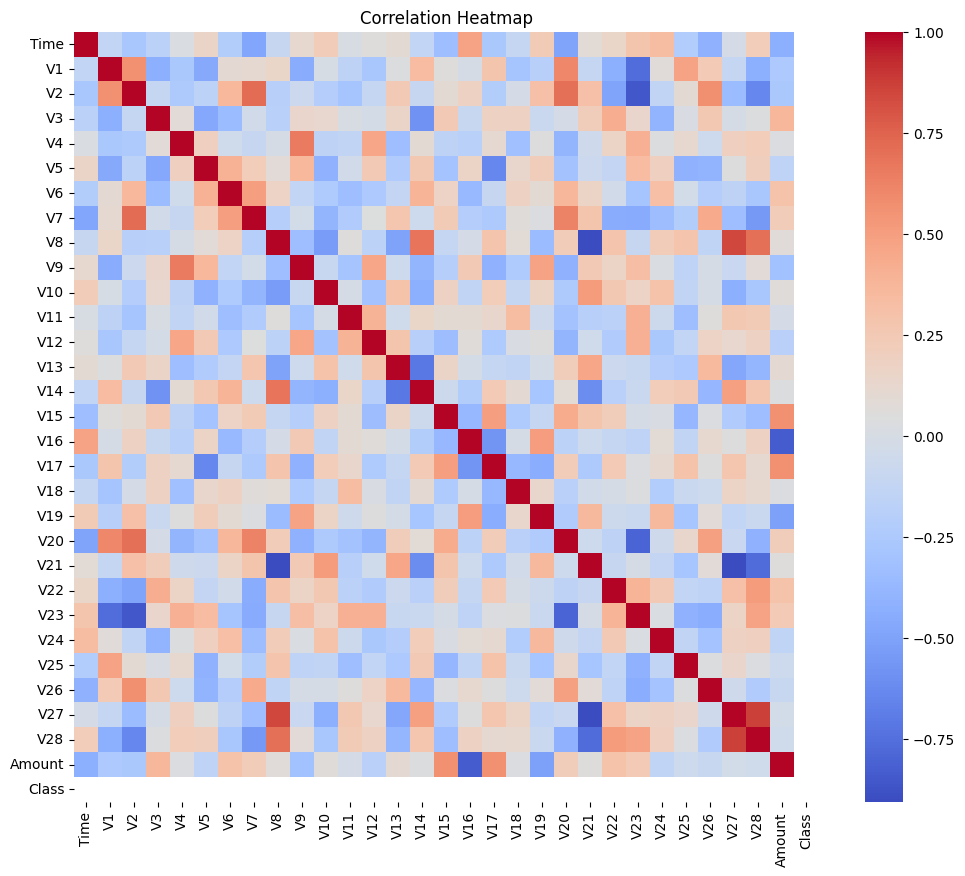

In [6]:
# Distribution of 'Class' (fraud vs non-fraud)
sns.countplot(data['Class'])
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Preprocess the Data:**

In [7]:
# Features and Target
X = data.drop(columns=['Class'])  # Features (all columns except 'Class')
y = data['Class']                # Target (fraud or not)

# Scale the 'Amount' and 'Time' columns
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

**Split the Data:**

In [15]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (15, 30)
X_test shape: (4, 30)


**Train the Model:**

In [8]:
# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Make Predictions:**

In [10]:
# Predict on the test set
y_pred = model.predict(X_test)

# Check the shape of predict_proba output
proba_shape = model.predict_proba(X_test).shape

# Access the correct index for probabilities based on shape
if proba_shape[1] > 1:
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC if multi-class
else:
    y_pred_proba = model.predict_proba(X_test)[:, 0]  # Probabilities for single class

**Evaluate the Model:**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: U

Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
AUC-ROC: nan


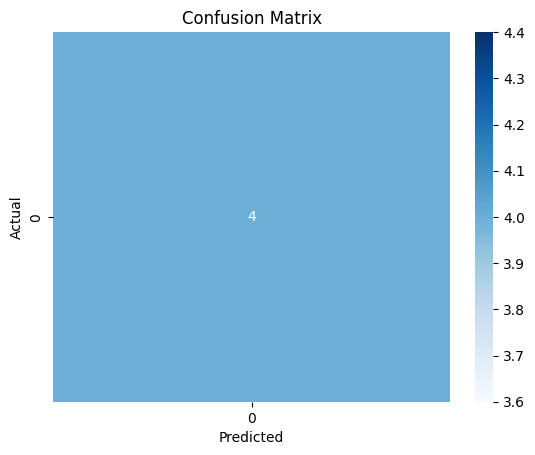

In [11]:
# Accuracy, Precision, Recall, F1-Score, and AUC-ROC
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# Identify important features
feature_importances = model.feature_importances_
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(important_features.sort_values(by='Importance', ascending=False))

   Feature  Importance
0     Time         0.0
1       V1         0.0
28     V28         0.0
27     V27         0.0
26     V26         0.0
25     V25         0.0
24     V24         0.0
23     V23         0.0
22     V22         0.0
21     V21         0.0
20     V20         0.0
19     V19         0.0
18     V18         0.0
17     V17         0.0
16     V16         0.0
15     V15         0.0
14     V14         0.0
13     V13         0.0
12     V12         0.0
11     V11         0.0
10     V10         0.0
9       V9         0.0
8       V8         0.0
7       V7         0.0
6       V6         0.0
5       V5         0.0
4       V4         0.0
3       V3         0.0
2       V2         0.0
29  Amount         0.0
